<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/DecisionTree_Assignment_winedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


#For spliting data into train and test
from sklearn.model_selection import train_test_split


#For the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report


#for pre processing
from sklearn import preprocessing

## READ CSV IN PANDAS AND BASIC EDA

In [3]:
df=pd.read_csv("/content/winedata.csv")

df.head()

,Class,Proline,OD280/OD315 of diluted wines,Hue,Color intensity,Proanthocyanins,Nonflavanoid phenols,Flavanoids,Total phenols,Magnesium,Magnesium.1,Ash,Malic acid,Alcohol
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()  # Traget column class is at index 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Proline                       178 non-null    float64
 2   OD280/OD315 of diluted wines  178 non-null    float64
 3   Hue                           178 non-null    float64
 4   Color intensity               178 non-null    float64
 5   Proanthocyanins               178 non-null    int64  
 6   Nonflavanoid phenols          178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Total phenols                 178 non-null    float64
 9   Magnesium                     178 non-null    float64
 10  Magnesium.1                   178 non-null    float64
 11  Ash                           178 non-null    float64
 12  Malic acid                    178 non-null    float64
 13  Alcoh

In [6]:
df.shape

(178, 14)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()   # clean

Class                           0
Proline                         0
OD280/OD315 of diluted wines    0
Hue                             0
Color intensity                 0
Proanthocyanins                 0
Nonflavanoid phenols            0
Flavanoids                      0
Total phenols                   0
Magnesium                       0
Magnesium.1                     0
Ash                             0
Malic acid                      0
Alcohol                         0
dtype: int64

In [10]:
df['Class'].value_counts()    # Target col is numeric so no need of encoding

2    71
1    59
3    48
Name: Class, dtype: int64

## Divide data in X and Y

In [13]:
x=df.iloc[:,1:]
y=df.iloc[:,:1]


##Create Train and Test dataset

In [14]:
# x_train  & y_train
# x_test & y_test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=40)

# NOTE" Sequence of x_train x_test, y_train y_test is fixed.
#test_size 0.1  means test data 10%
# meaning training data 90%

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 13), (18, 13), (160, 1), (18, 1))

####Building Decision Tree Classifier using Entropy as a Criterion

In [16]:
model= DecisionTreeClassifier(criterion='entropy',max_depth =4,random_state=2)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)

[Text(0.4230769230769231, 0.9, 'x[6] <= 1.575\nentropy = 1.566\nsamples = 160\nvalue = [53, 64, 43]'),
 Text(0.15384615384615385, 0.7, 'x[9] <= 3.825\nentropy = 0.782\nsamples = 56\nvalue = [0, 13, 43]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0]'),
 Text(0.23076923076923078, 0.5, 'x[3] <= 17.15\nentropy = 0.156\nsamples = 44\nvalue = [0, 1, 43]'),
 Text(0.15384615384615385, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3076923076923077, 0.3, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]'),
 Text(0.6923076923076923, 0.7, 'x[12] <= 722.5\nentropy = 1.0\nsamples = 104\nvalue = [53, 51, 0]'),
 Text(0.5384615384615384, 0.5, 'x[0] <= 13.175\nentropy = 0.146\nsamples = 48\nvalue = [1, 47, 0]'),
 Text(0.46153846153846156, 0.3, 'entropy = 0.0\nsamples = 44\nvalue = [0, 44, 0]'),
 Text(0.6153846153846154, 0.3, 'x[1] <= 2.82\nentropy = 0.811\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.5384615384615384, 0.1, 'entropy = 0.0\nsamples = 3\nva

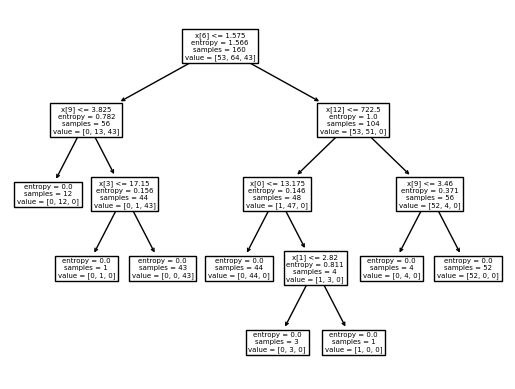

In [17]:
tree.plot_tree(model)

## Prediction on the Test data

In [ ]:
## Prediction on the Test data

In [18]:
preds = model.predict(x_test)

In [19]:
preds

array([2, 1, 1, 3, 3, 2, 1, 2, 2, 1, 2, 3, 1, 2, 2, 3, 3, 1])

In [20]:
y_test

,Class
127,2
5,1
52,1
145,3
162,3
69,2
23,1
115,2
126,2
26,1


## Crosstab : way to check 2d table values predicted vs actual

In [23]:
pd.crosstab(y_test['Class'],preds)

col_0,1,2,3
Class,,,
1,6,0,0
2,0,7,0
3,0,0,5


## ACCURACY of MODEL

In [24]:
np.mean(preds==y_test['Class'])

1.0

In [25]:
#Add these y_test column and predicted coluns into x_test
x_test['y_testing']=y_test
x_test['Preds']=preds

In [26]:
x_test

,Proline,OD280/OD315 of diluted wines,Hue,Color intensity,Proanthocyanins,Nonflavanoid phenols,Flavanoids,Total phenols,Magnesium,Magnesium.1,Ash,Malic acid,Alcohol,y_testing,Preds
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,2,2
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1,1
52,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190,1,1
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830,3,3
162,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570,3,3
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,2,2
23,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,1,1
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407,2,2
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,2,2
26,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195,1,1
